# Principal Component Analysis on a simple 2D example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

## Create the data

In [2]:
mean = np.array([0,0])
P = np.array([[1, 1], [-1, 1]]) # kind of rotation matrix, to bend my distribution
cov = np.dot(np.dot(P, np.array([[0.1,0],[0,1]])), np.linalg.inv(P))

print cov

[[ 0.55  0.45]
 [ 0.45  0.55]]


In [3]:
x, y = np.random.multivariate_normal(mean, cov, 100).T

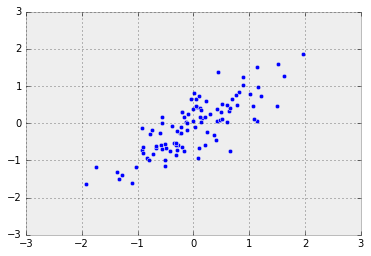

In [4]:
plt.axis([-3,3,-3,3])
plt.scatter(x, y)

## Find and display the components

We want the covariance matrix of the data to be diagonal. The unbiased covariance is given by $\frac{1}{m-1} X^T X$ (if $X$ is centered), which is symmetric positive. Therefore, it can be diagonalised with an orthogonal matrix: $X^T X = W \Sigma W^T$. Each column of $W$ contains a component

Thus, $\Sigma = W^T X^T X W = Z^T Z = (m - 1) covar(Z)$ if we defined $Z = XW$. 

$Z$ is therefore our new representation (its covariance is diagonal)

In [26]:
X = np.concatenate([x.reshape(len(x), 1), y.reshape(len(y), 1)], axis=1)

In [27]:
W = np.linalg.eig(np.dot(X.transpose(), X))[1]
vp = np.linalg.eig(np.dot(X.transpose(), X))[0]
print W
print vp

[[-0.73428742 -0.67883871]
 [ 0.67883871 -0.73428742]]
[ 10.64122821  96.32352248]


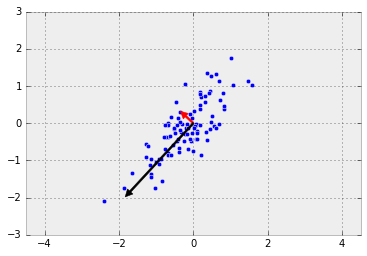

In [34]:
plt.axis("equal")
plt.axis([-3,3,-3,3])
plt.scatter(x, y)

norm = 2.5 # we want the biggest arrow to have norm 2.5
if vp[0] > vp[1]:
    coeff0 = norm
    coeff1 = norm * vp[1] / vp[0]
else:
    coeff1 = norm
    coeff0 = norm * vp[0] / vp[1]

plt.arrow(0, 0, W[0][0]*coeff0, W[1][0]*coeff0, head_width=0.2, head_length=0.2, width=0.05, fc='r', ec='r')
plt.arrow(0, 0, W[0][1]*coeff1, W[1][1]*coeff1, head_width=0.2, head_length=0.2, width=0.05, fc='k', ec='k')

## Compute and display the new representation

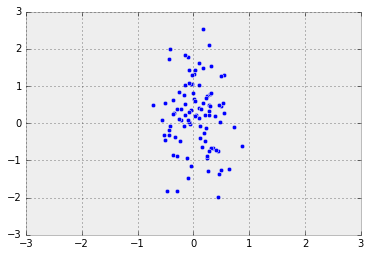

In [35]:
Z = np.dot(X, W)
plt.axis([-3,3,-3,3])
plt.scatter(Z[:,0], Z[:,1])

We can see by printing $Z^T Z$ that it is effectively a diagonal matrix, where the first eigenvalue is 10 times bigger than the second. Thus, the first axis is the principal component, and we could remove the second axis without losing so much information.

In [36]:
print np.dot(Z.transpose(), Z)

[[  1.06412282e+01  -2.16493490e-15]
 [ -2.16493490e-15   9.63235225e+01]]
